In [131]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [132]:
df = pd.read_csv("Customer_Behaviour.csv")
df.head(5)

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Techniques to choose the right machine learning algorithm

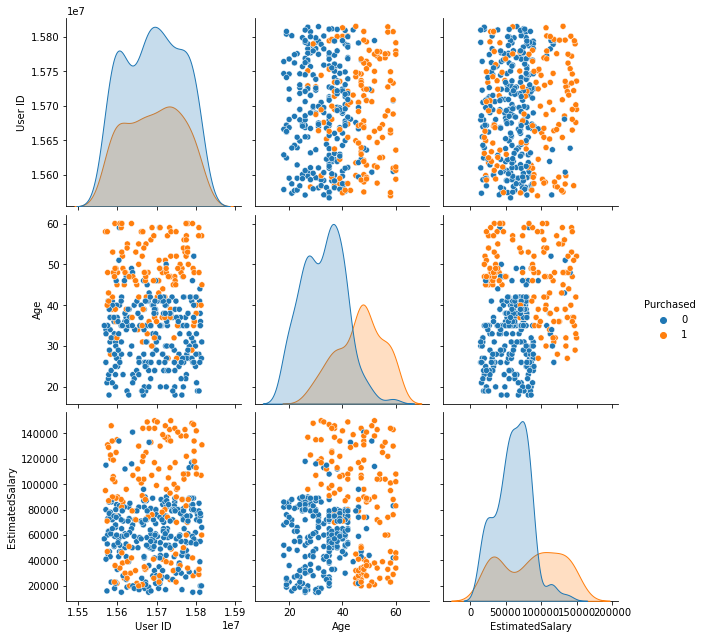

In [6]:
#PairPlot to choose right algorithm
sb.pairplot(data=df[['User ID' ,'Gender','Age', 'EstimatedSalary','Purchased']], hue='Purchased', dropna=True, height=3)

In [21]:
#Import Sklearn Libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

 # Size of Training Data & Training Time

In [31]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## LogisticRegression

In [17]:
#Import sklearn library
from sklearn.linear_model import LogisticRegression
import time
clf = LogisticRegression(random_state = 0) 
start = time.time()
clf.fit(X_train,y_train) 
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.45989179611206055s


## Support Vector Machine

In [18]:
# Support Vector Classifier
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
start = time.time() 
# fitting x samples and y classes 
clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.2769174575805664s


## Random Forest

In [19]:
#Create a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
start = time.time()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.30957889556884766s


## Decision Tree

In [22]:
# Create Decision Tree classifier object
import time
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
start = time.time()
clf = clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.00782012939453125s


## Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
start = time.time()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.009451866149902344s


## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
start = time.time()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.1349937915802002s


In [33]:
# From the above results, we can conclude that Decision Trees will take much less time than all algorithms for small dataset. 
# Hence, it is recommended to use a low bias/high variance classifier like a decision tree.

## Decision Tree Algorithm for Customer Behaviour Dataset

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
import re

In [68]:
data = pd.read_csv("Customer_Behaviour.csv")
data.head()

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [69]:
print("Dataset Length:: ",len(data))
print("Dataset Shape:: ",data.shape)

Dataset Length::  400
Dataset Shape::  (400, 5)


In [70]:
data.shape
data.info()
data.describe(include='all')
data.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UserID           400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,UserID,Age,EstimatedSalary,Purchased
UserID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [71]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

data['Gender']= label_encoder.fit_transform(data['Gender']) 
data

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [72]:
data.isnull().sum()

UserID             0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [73]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [74]:
# Normalized data frame (considering the numerical part of data)
data_norm = norm_func(data.iloc[:,0:])
data_norm.tail(10)

,UserID,Gender,Age,EstimatedSalary,Purchased
390,0.970231,1.0,0.714286,0.133333,1.0
391,0.104129,1.0,0.690476,0.059259,1.0
392,0.731854,0.0,0.642857,0.222222,1.0
393,0.278434,1.0,1.000000,0.200000,1.0
394,0.768237,0.0,0.500000,0.325926,0.0
395,0.503623,0.0,0.666667,0.192593,1.0
396,0.560787,1.0,0.785714,0.059259,1.0
397,0.352477,0.0,0.761905,0.037037,1.0
398,0.757720,1.0,0.428571,0.133333,0.0
399,0.110048,0.0,0.738095,0.155556,1.0


In [75]:
#Store independent and dependent variable

feature = ['UserID' ,'Gender','Age', 'EstimatedSalary']
X = data[feature] # Features
Y = data["Purchased"]

In [76]:
data['Purchased'].unique() 

array([0, 1], dtype=int64)

In [77]:
data.Purchased.value_counts() 

0    257
1    143
Name: Purchased, dtype: int64

In [78]:
colnames = list(data.columns)
colnames

['UserID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

In [79]:
# Splitting dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50) 

### Building Decision Tree Classifier using Entropy Criteria

In [80]:
#Function to perform training with Entropy
model = DecisionTreeClassifier (criterion = "entropy", random_state = 100,
max_depth = 3, min_samples_leaf = 5)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

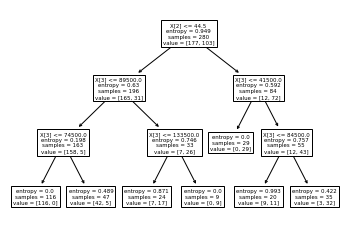

In [81]:
#PLot the decision tree
tree.plot_tree(model);

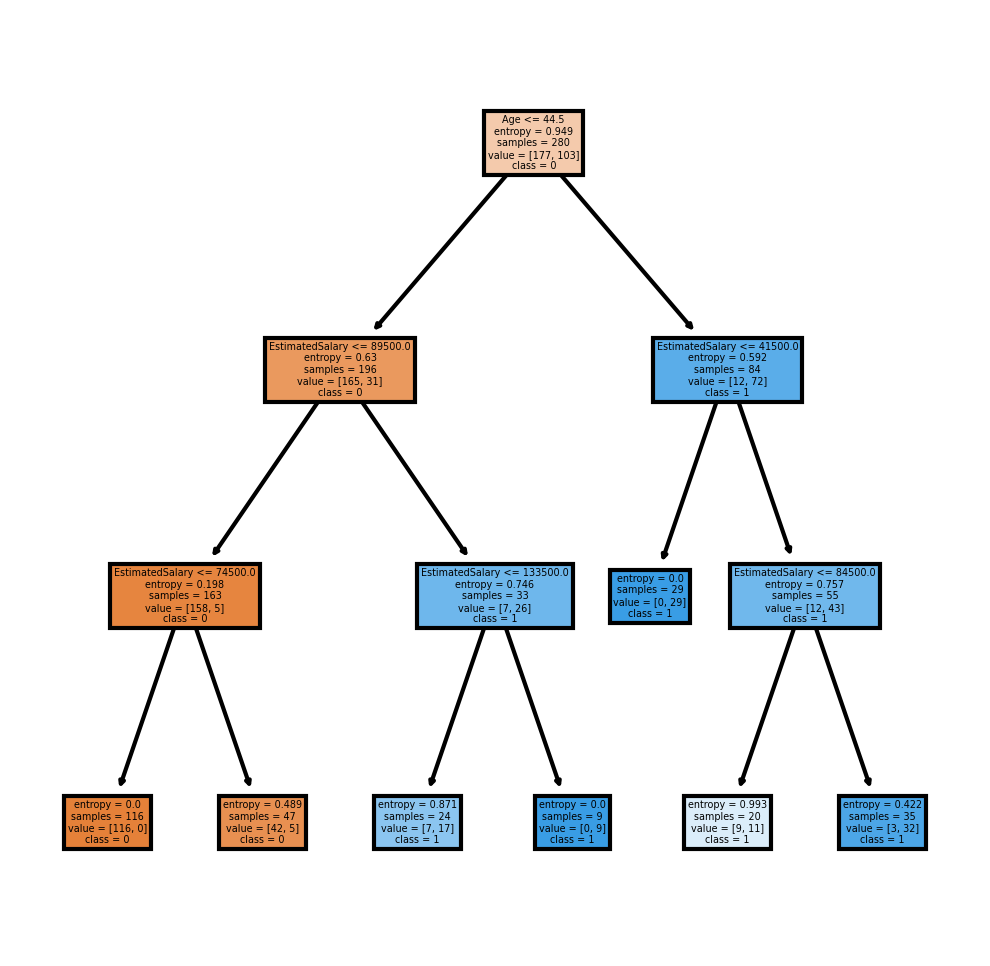

In [82]:
fn=['UserID' ,'Gender','Age', 'EstimatedSalary']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [18]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    76
1    44
dtype: int64

In [19]:
preds 

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [20]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Purchased,,
0,73,7
1,3,37


In [21]:
# Accuracy 
np.mean(preds==y_test)

0.9166666666666666

### Building Decision Tree Classifier (CART) using Gini Criteria

In [22]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [23]:
model_gini.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [24]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==y_test) 

0.9166666666666666

#### Decision Tree Regression Example¶

In [25]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor 

In [26]:
array = data.values
X = array[:,0:4]
y = array[:,4] 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3) 

In [28]:
model = DecisionTreeRegressor(criterion='mse', max_depth=None)
model.fit(X_train, y_train) 

DecisionTreeRegressor()

In [29]:
#Find the accuracy
model.score(X_test,y_test) 

0.5328614762386248

# Using Naive Bayes Algorithm

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [86]:
data = pd.read_csv("Customer_Behaviour.csv")
data.head()

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [87]:
data['Gender']= label_encoder.fit_transform(data['Gender']) 
data

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [88]:
#Store independent and dependent variable

ip_columns = ['UserID' ,'Gender','Age', 'EstimatedSalary']
op_column  = ["Purchased"]

In [89]:
# Splitting dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(data[ip_columns],data[op_column],test_size=0.3, random_state=0)

In [90]:
ignb = GaussianNB()
imnb = MultinomialNB()

In [107]:
# Building and predicting at the same time 

pred_gnb = ignb.fit(X_train,y_train).predict(X_test)

C:\Users\anbuc\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [92]:
# Confusion matrix GaussianNB model
confusion_matrix(y_test,pred_gnb) # GaussianNB model
pd.crosstab(y_test.values.flatten(),pred_gnb) # confusion matrix using 

col_0,0,1
row_0,,
0,74,5
1,9,32


In [93]:
np.mean(pred_gnb==y_test.values.flatten()) 

0.8833333333333333

In [97]:
# print the first 10 predicted probabilities of two classes- 0 and 1

pred_gnb_prob = ignb.predict_proba(X_test)[0:10]
pred_gnb_prob

array([[0.8996394 , 0.1003606 ],
       [0.83880997, 0.16119003],
       [0.86397392, 0.13602608],
       [0.92401013, 0.07598987],
       [0.89629033, 0.10370967],
       [0.96097003, 0.03902997],
       [0.90670446, 0.09329554],
       [0.0497664 , 0.9502336 ],
       [0.98890257, 0.01109743],
       [0.49260948, 0.50739052]])

In [103]:
# store the probabilities in dataframe

pred_gnb_prob_df = pd.DataFrame(data=pred_gnb_prob, columns=['Prob of Not Purchased - 0', 'Prob of Purchased- 1'])

pred_gnb_prob_df

,Prob of Not Purchased - 0,Prob of Purchased- 1
0,0.899639,0.100361
1,0.838810,0.161190
2,0.863974,0.136026
3,0.924010,0.075990
4,0.896290,0.103710
5,0.960970,0.039030
6,0.906704,0.093296
7,0.049766,0.950234
8,0.988903,0.011097
9,0.492609,0.507391


In [104]:
# print the first 10 predicted probabilities for Probability of Purchased 

ignb.predict_proba(X_test)[0:10, 1]

array([0.1003606 , 0.16119003, 0.13602608, 0.07598987, 0.10370967,
       0.03902997, 0.09329554, 0.9502336 , 0.01109743, 0.50739052])

In [105]:
# store the predicted probabilities for class 1 - Probability of Purchased 

pred1 = ignb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

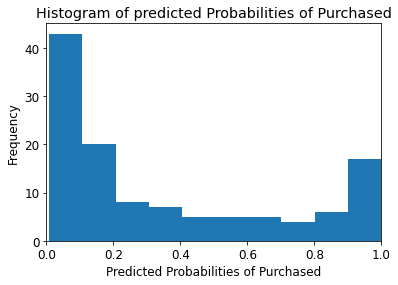

In [106]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted Probabilities of Purchased')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted Probabilities of Purchased')
plt.ylabel('Frequency')

In [108]:
pred_mnb = imnb.fit(X_train,y_train).predict(X_test)

C:\Users\anbuc\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [109]:
# Confusion matrix Multinomal model
confusion_matrix(y_test,pred_mnb) # Multinomal model
pd.crosstab(y_test.values.flatten(),pred_mnb) # confusion matrix using 

col_0,0,1
row_0,,
0,49,30
1,14,27


In [110]:
np.mean(pred_mnb==y_test.values.flatten()) 

0.6333333333333333

In [112]:
# print the first 10 predicted probabilities of two classes- 0 and 1

pred_mnb_prob = imnb.predict_proba(X_test)[0:10]
pred_mnb_prob

array([[0.0000000e+000, 1.0000000e+000],
       [1.0000000e+000, 0.0000000e+000],
       [4.7446863e-317, 1.0000000e+000],
       [0.0000000e+000, 1.0000000e+000],
       [1.0000000e+000, 0.0000000e+000],
       [1.0000000e+000, 0.0000000e+000],
       [1.0000000e+000, 0.0000000e+000],
       [0.0000000e+000, 1.0000000e+000],
       [1.0000000e+000, 0.0000000e+000],
       [1.0000000e+000, 0.0000000e+000]])

In [113]:
# store the probabilities in dataframe

pred_mnb_prob_df = pd.DataFrame(data=pred_mnb_prob, columns=['Prob of Not Purchased - 0', 'Prob of Purchased- 1'])

pred_mnb_prob_df

,Prob of Not Purchased - 0,Prob of Purchased- 1
0,0.000000e+00,1.0
1,1.000000e+00,0.0
2,4.744686e-317,1.0
3,0.000000e+00,1.0
4,1.000000e+00,0.0
5,1.000000e+00,0.0
6,1.000000e+00,0.0
7,0.000000e+00,1.0
8,1.000000e+00,0.0
9,1.000000e+00,0.0


In [114]:
# print the first 10 predicted probabilities for Probability of Purchased 

imnb.predict_proba(X_test)[0:10, 1]

array([1., 0., 1., 1., 0., 0., 0., 1., 0., 0.])

In [116]:
# store the predicted probabilities for class 1 - Probability of Purchased 

pred2 = imnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

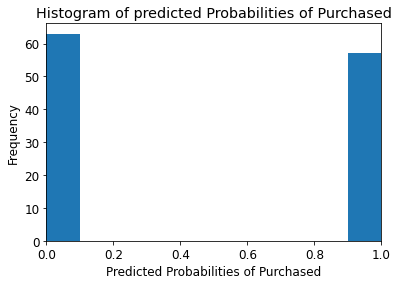

In [117]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(pred2, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted Probabilities of Purchased')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted Probabilities of Purchased')
plt.ylabel('Frequency')

In [118]:
bnb = BernoulliNB(binarize= True)
pred_bnb = bnb.fit(X_train,y_train).predict(X_test)
print(pred_bnb)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


C:\Users\anbuc\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [120]:
confusion_matrix(y_test,pred_bnb)

array([[79,  0],
       [41,  0]], dtype=int64)

In [121]:
print("Accuracy",(79)/(79+41))

Accuracy 0.6583333333333333


In [123]:
# print the first 10 predicted probabilities of Purchased

pred_bnb_prob = bnb.predict_proba(X_test)[0:10]

pred_bnb_prob

array([[0.63949528, 0.36050472],
       [0.63949528, 0.36050472],
       [0.63949528, 0.36050472],
       [0.63949528, 0.36050472],
       [0.63949528, 0.36050472],
       [0.63949528, 0.36050472],
       [0.63949528, 0.36050472],
       [0.63949528, 0.36050472],
       [0.63949528, 0.36050472],
       [0.63949528, 0.36050472]])

In [124]:
# store the probabilities in dataframe

pred_bnb_prob_df = pd.DataFrame(data=pred_bnb_prob, columns=['Prob of - 0', 'Prob of - 1'])

pred_bnb_prob_df

,Prob of - 0,Prob of - 1
0,0.639495,0.360505
1,0.639495,0.360505
2,0.639495,0.360505
3,0.639495,0.360505
4,0.639495,0.360505
5,0.639495,0.360505
6,0.639495,0.360505
7,0.639495,0.360505
8,0.639495,0.360505
9,0.639495,0.360505


In [125]:
# print the first 10 predicted probabilities for Purchased

bnb.predict_proba(X_test)[0:10, 1]

array([0.36050472, 0.36050472, 0.36050472, 0.36050472, 0.36050472,
       0.36050472, 0.36050472, 0.36050472, 0.36050472, 0.36050472])

In [126]:
# store the predicted probabilities for Purchased

pred3 = bnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

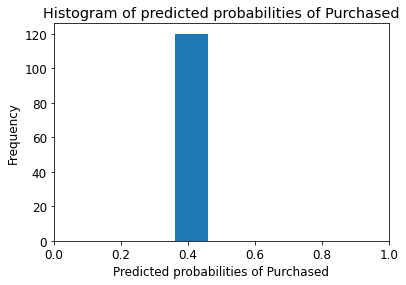

In [127]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(pred3, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Purchased')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Purchased')
plt.ylabel('Frequency')

# Using SVM Algorithm

In [46]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [47]:
df = pd.read_csv("Customer_Behaviour.csv")
df

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [48]:
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [49]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=0)
columns=list(df.columns)

In [50]:
predictors=columns[0:4]
target=columns[4]

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

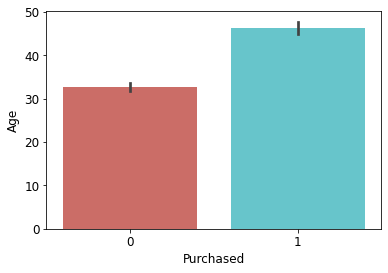

In [129]:
sns.barplot(x="Purchased",y="Age",data=df,palette = "hls")

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

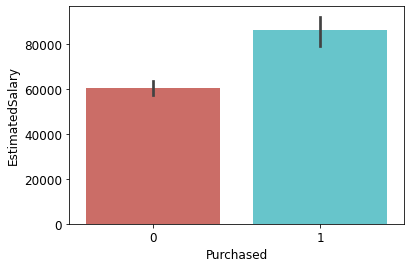

In [130]:
sns.barplot(x="Purchased",y="EstimatedSalary",data=df,palette = "hls")

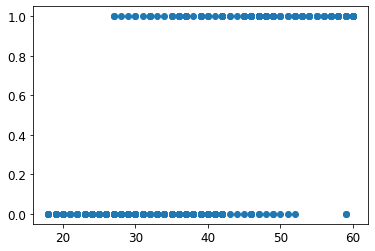

In [159]:
plt.scatter(df.Age,df.Purchased)## scatter plot of two variables

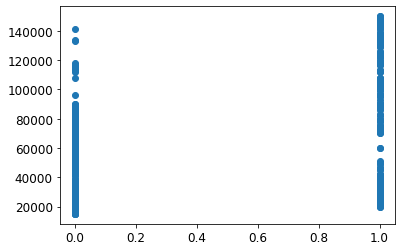

In [161]:
plt.scatter(df.Purchased,df.EstimatedSalary)## scatter plot of two variables

In [51]:
#SVM Classification using Kernels: linear,poly,rbf

In [52]:
#kernel=linear
model_linear=SVC(kernel='linear')
model_linear.fit(train[predictors],train[target])
train_pred_linear=model_linear.predict(train[predictors])
test_pred_linear=model_linear.predict(test[predictors])

In [53]:
train_lin_acc=np.mean(train_pred_linear==train[target])
test_lin_acc=np.mean(test_pred_linear==test[target])

In [54]:
train_lin_acc

0.753125

In [55]:
test_lin_acc

0.8125

In [56]:
#kernel=poly
model_poly=SVC(kernel='poly')
model_poly.fit(train[predictors],train[target])
train_pred_poly=model_poly.predict(train[predictors])
test_pred_poly=model_poly.predict(test[predictors])

In [57]:
train_poly_acc=np.mean(train_pred_poly==train[target])
test_poly_acc=np.mean(test_pred_poly==test[target])

In [58]:
train_poly_acc

0.621875

In [59]:
test_poly_acc

0.725

In [60]:
#kernel=rbf
model_rbf=SVC(kernel='rbf')
model_rbf.fit(train[predictors],train[target])
train_pred_rbf=model_rbf.predict(train[predictors])
test_pred_rbf=model_rbf.predict(test[predictors])

In [61]:
train_rbf_acc=np.mean(train_pred_rbf==train[target])
test_rbf_acc=np.mean(test_pred_rbf==test[target])

In [62]:
train_rbf_acc

0.621875

In [63]:
test_rbf_acc

0.725

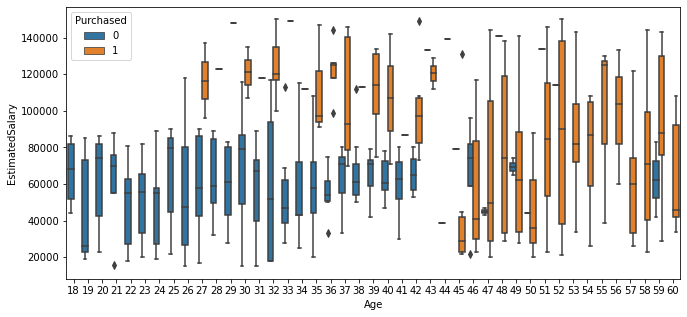

In [64]:
f, ax = plt.subplots(figsize=(11,5))
sns.boxplot(x="Age", y="EstimatedSalary", hue="Purchased", data=df);

array([[<AxesSubplot:xlabel='UserID', ylabel='UserID'>,
        <AxesSubplot:xlabel='Gender', ylabel='UserID'>,
        <AxesSubplot:xlabel='Age', ylabel='UserID'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='UserID'>,
        <AxesSubplot:xlabel='Purchased', ylabel='UserID'>],
       [<AxesSubplot:xlabel='UserID', ylabel='Gender'>,
        <AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='Age', ylabel='Gender'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Gender'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Gender'>],
       [<AxesSubplot:xlabel='UserID', ylabel='Age'>,
        <AxesSubplot:xlabel='Gender', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Age'>],
       [<AxesSubplot:xlabel='UserID', ylabel='EstimatedSalary'>,
        <AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>,
        <AxesSu

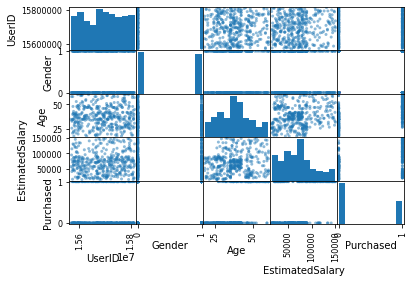

In [65]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

In [153]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

results = {
    'model': [],
    'score': []
}

In [154]:
!pip install xgboost

In [155]:
models = [
    ('random_forest', RandomForestClassifier(n_estimators=10)),
    ('svm', SVC(gamma='auto')),
    ('decision_tree', DecisionTreeClassifier(max_depth = 3, class_weight = "balanced")),
    ('xgboost', XGBClassifier())
]

cv = KFold(n_splits=5)

In [156]:
for (model_name, model) in models:
    score = np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1))
    results['model'].append(model_name)
    results['score'].append(score)

C:\Users\anbuc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:39:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anbuc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:39:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anbuc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:39:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anbuc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:39:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anbuc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [157]:
pd.DataFrame(results)

,model,score
0,random_forest,0.8775
1,svm,0.6425
2,decision_tree,0.8975
3,xgboost,0.8750


# Summary:

Accuracy is best at Decision_tree with a score of 91%..